# <font color='crimson'>Calgary Crime Analysis</font>
<font color='grey'>Lin Chen</font><br>

[Part 1. Introduction](#p1)<br>[Part 2. Data Wrangling](#p2)<br>[Part 3. Data Analysis](#p3)<br>[Part 4. Conclusion](#p4)

<a id='p1'></a>
## <font color='palevioletred'>Part 1. Introduction</font>
[Step 1. Research Motivation](#step1.1)<br>[Step 2. Guiding Questions](#step1.2)

<a id='step1.1'></a>
### <font color='palevioletred'>Step 1. Research Motivation</font>
As newly admitted graduate students at the University of Calgary, safety issues could be one of the most significant concerns, since we may have lots of questions associated to our daily lives and public safety, such as:<br><br>
<font color='lightslategrey'>Where to live?<br>Where to go shopping?<br>Which time and where to hang out at night…</font><br>

Therefore, conducting detailed research about community crime statistics could be both reasonable and useful for new residents to discover the city and make safe choices.

<a id='step1.2'></a>
### <font color='palevioletred'>Step 2. Guiding Questions</font>
All our guiding questions can be divided into four categories:<br><br>
**1. Time-related:**<br>
<font color='lightslategrey'>Which time in a year is relatively safe?<br>Is Calgary becoming a safer place during recent years?</font><br>
**2. Location-related**:<br>
<font color='lightslategrey'>Which area in Calgary is relatively safe?<br>Which area in Calgary is relatively unsafe?<br>How unsafe is the downtown area, what's the major crime specie here?</font><br>
**3. Crime-related**:<br>
<font color='lightslategrey'>What are general categories for crime records in Calgary?<br>What kind of crime happened most frequently?<br>How can we correctly measure safety level by using crime data?</font><br>
**4. Advanced-level**:<br>
<font color='lightslategrey'>Can I have an crime map? Better to be an interactive one.<br>Can I use animation to show how safety level changes by both location and time?</font>

**Python Libraries Used**:<br><br>
Numpy, Pandas, Matplotlib, GeoPandas, Geoplot, Plotly, Folium, etc.

<a id='p2'></a>
## <font color='palevioletred'>Part 2. Data Wrangling</font>
[Step 1. Data Gathering](#step2.1)<br>[Step 2. Data Assessing](#step2.2)<br>
[Step 3. Data Cleansing](#step2.3)<br>[Step 4. Data Storing](#step2.4)

In [1]:
### loading Python libraries

# for data processing
import numpy as np
import pandas as pd
import calendar as calendar
import datetime as dt
import re # regular expression

# for regular plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import mapclassify as mc

# for geographical plot
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import folium

# for animations
import plotly.graph_objects as go
import plotly.express as px

# stop warnings
import warnings
warnings.simplefilter('ignore')

<a id='step2.1'></a>
### <font color='palevioletred'>Step 1. Data Gathering</font>
Data Source: https://data.calgary.ca/Health-and-Safety/Community-Crime-and-Disorder-Statistics-to-be-arch/848s-4m4z<br><br>
<font color='lightslategrey'>Click 'Export' on the top right part of webpage, and choose 'CSV' format to download. This tabular dataset includes category, time, location and other information for Calgary crimes from 2012-2019, and needs to be cleaned.</font>
    
Data License: https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa<br><br>
<font color='lightslategrey'>Free to copy, modify, publish, translate, adapt, distribute or use the Information in any medium.

In [2]:
df_raw = pd.read_csv('Community_Crime_and_Disorder_Statistics__to_be_archived_.csv') # load dataset

<a id='step2.2'></a>
### <font color='palevioletred'>Step 2. Data Assessing</font>
Identify Data Quality Issues:

**Edit Columns:**<br> 1) column <font color='crimson'>ID</font> is just a combination of crime information from other columns.<br> 2) few column names are too verbose.

**Wrong Datatypes:**<br> 1) column <font color='crimson'>Date</font> is not under a correct datetype format.<br> 2) column <font color='crimson'>Community Center Point</font> is in a from of (a, b) and cannot be used directly.

**Missing Values:**<br> 1) for row No.4022, category for the crime is missing.<br> 2) column <font color='crimson'>Resident Count</font> has lots of values of 0, some of them are probably missing data.

**Data Conflicts:**<br> 1) some communities were categorized into different sectors in different years.<br>

In [3]:
df_raw.head() # general view of raw dataset

Sector Community Name Group Category                  Category  Crime Count  \
0  NORTH    THORNCLIFFE          Crime        Theft FROM Vehicle            9   
1  SOUTH       WOODBINE          Crime        Theft FROM Vehicle            3   
2  SOUTH    WILLOW PARK          Crime        Theft FROM Vehicle            4   
3  SOUTH    WILLOW PARK          Crime        Commercial Robbery            1   
4   WEST   LINCOLN PARK          Crime  Commercial Break & Enter            5   

   Resident Count                    Date  Year Month  \
0            8474  03/01/2018 12:00:00 PM  2018   MAR   
1            8866  11/01/2019 12:00:00 AM  2019   NOV   
2            5328  11/01/2019 12:00:00 AM  2019   NOV   
3            5328  11/01/2019 12:00:00 AM  2019   NOV   
4            2617  11/01/2019 12:00:00 AM  2019   NOV   

                                                 ID  \
0         2018-MAR-THORNCLIFFE-Theft FROM Vehicle-9   
1            2019-NOV-WOODBINE-Theft FROM Vehicle-3   
2         2019-NOV-WILLOW PARK-Theft FROM Vehicle-4   
3         2019-NOV-WILLOW PARK-Commercial Robbery-1   
4  2019-NOV-LINCOLN PARK-Commercial Break & Enter-5   

                      Community Center Point  
0       (51.103099554741, -114.068779421169)  
1  (50.939610852207664, -114.12962865374453)  
2   (50.95661926653037, -114.05620194518823)  
3   (50.95661926653037, -114.05620194518823)  
4    (51.0100906918158, -114.12955694059636)

In [4]:
print('df_raw has shape of', df_raw.shape[0], 'rows and', df_raw.shape[1], 'columns.') # dataset scale

df_raw has shape of 114848 rows and 11 columns.


In [5]:
df_raw.isnull().sum() # no missing values

Sector                    0
Community Name            0
Group Category            0
Category                  0
Crime Count               0
Resident Count            0
Date                      0
Year                      0
Month                     0
ID                        0
Community Center Point    0
dtype: int64

In [6]:
df_raw.info() # datatype should be changed for two datatypes: 'Month', 'Community center point'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114848 entries, 0 to 114847
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Sector                  114848 non-null  object
 1   Community Name          114848 non-null  object
 2   Group Category          114848 non-null  object
 3   Category                114848 non-null  object
 4   Crime Count             114848 non-null  int64 
 5   Resident Count          114848 non-null  int64 
 6   Date                    114848 non-null  object
 7   Year                    114848 non-null  int64 
 8   Month                   114848 non-null  object
 9   ID                      114848 non-null  object
 10  Community Center Point  114848 non-null  object
dtypes: int64(3), object(8)
memory usage: 9.6+ MB


In [7]:
df_raw.nunique() # it seems that there are only year and month info for crimes, so there are only 8*12=96 data in 'Date'

Sector                         8
Community Name               301
Group Category                 2
Category                      11
Crime Count                  363
Resident Count              1734
Date                          96
Year                           8
Month                         12
ID                        114848
Community Center Point       937
dtype: int64

In [8]:
df_raw.Sector.unique() # unique sectors in Calgary

array(['NORTH', 'SOUTH', 'WEST', 'CENTRE', 'SOUTHEAST', 'NORTHWEST',
       'NORTHEAST', 'EAST'], dtype=object)

In [9]:
df_raw['Group Category'].unique() # unique crime groups in Calgary

array(['Crime', 'Disorder'], dtype=object)

In [10]:
df_raw.Category.unique() # the category '1320.131' looks like a wrong record!

array(['Theft FROM Vehicle', 'Commercial Robbery',
       'Commercial Break & Enter', 'Social Disorder', 'Theft OF Vehicle',
       'Assault (Non-domestic)', 'Residential Break & Enter',
       'Physical Disorder', 'Violence Other (Non-domestic)',
       'Street Robbery', '1320.131'], dtype=object)

In [11]:
df_raw[df_raw.Category=='1320.131'] # for this crime, we cannot know its category

Sector Community Name Group Category  Category  Crime Count  \
4022   WEST   LINCOLN PARK          Crime  1320.131            1   

      Resident Count                    Date  Year Month  \
4022            2617  09/01/2019 12:00:00 AM  2019   SEP   

                                     ID  \
4022  2019-SEP-LINCOLN PARK-1320.1310-1   

                       Community Center Point  
4022  (51.0100906918158, -114.12955694059636)

In [12]:
df_raw.Year.unique() # unique years

array([2018, 2019, 2017, 2016, 2015, 2014, 2013, 2012], dtype=int64)

In [13]:
df_raw.Month.unique() # unique months

array(['MAR', 'NOV', 'DEC', 'SEP', 'APR', 'FEB', 'OCT', 'JUL', 'JUN',
       'MAY', 'AUG', 'JAN'], dtype=object)

In [14]:
df_raw.describe() # 801 as crime count looks too high, and 0 as resident count looks too low

Crime Count  Resident Count           Year
count  114848.000000    114848.00000  114848.000000
mean        8.231018      5980.42854    2015.668196
std        26.171051      5127.65733       2.278545
min         1.000000         0.00000    2012.000000
25%         1.000000      1895.00000    2014.000000
50%         2.000000      5335.00000    2016.000000
75%         6.000000      8885.00000    2018.000000
max       801.000000     25990.00000    2019.000000

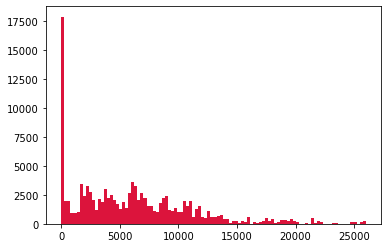

In [15]:
plt.hist(df_raw['Resident Count'], bins=100, color='crimson'); # resident distribution by community

In [16]:
df_raw[df_raw['Resident Count']==0].shape # lots of resident count values are zero

(13542, 11)

In [17]:
df_raw[df_raw['Crime Count']==801] # this is reasonable since there are lots of disorder cases in downtown area

Sector Community Name Group Category         Category  Crime Count  \
112053  CENTRE       BELTLINE       Disorder  Social Disorder          801   

        Resident Count                    Date  Year Month  \
112053           25129  07/01/2019 12:00:00 AM  2019   JUL   

                                           ID  \
112053  2019-JUL-BELTLINE-Social Disorder-801   

                          Community Center Point  
112053  (51.03743792621707, -114.05518879725622)

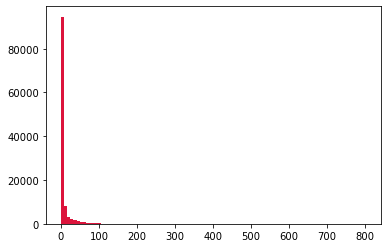

In [18]:
plt.hist(df_raw['Crime Count'], bins=100, color='crimson'); # most crime count values are less than 100

In [19]:
sum(df_raw.duplicated()) # no duplicated rows

0

In [20]:
geo = df_raw[['Sector', 'Community Name']].drop_duplicates().reset_index(drop=True)
geo['Community Name'][geo['Community Name'].duplicated()] # each of these communities are put into multiple sectors

299    GREENVIEW INDUSTRIAL PARK
300                GLENMORE PARK
301                    GREENVIEW
Name: Community Name, dtype: object

<a id='step2.3'></a>
### <font color='palevioletred'>Step 3. Data Cleansing</font>
Solve Data Quality Issues (Part 1):

**Edit Columns:**<br> 1) drop the column of <font color='crimson'>ID</font>.<br> 2) rename column names with two words into single-word names for conveniency.<br>

**Wrong Datatypes:**<br> 1) correct datatype for column <font color='crimson'>Date</font>.<br> 2) column <font color='crimson'>Community Center Point</font> should be split into two floats as latitudes and longitudes.<br>

**Missing Values:**<br> 1) for row No.4022, put 'unknown' as crime category.<br> 2) for column <font color='crimson'>Resident Count</font> has lots of values of 0, try our best to recover missing values.<br>
<font color='lightslategrey'>For example, crimes could happen in areas without residents, like a wildland. In fact, there is no resident in industrial area or even airport, since people just work but not live there. The solution is 'take the maximum': if we have 5 records for resident count at community A in October 2018: [50, 50, 50, 49, 0], then all of them will be changed to 50. If those five records are [0, 0, 0, 0, 0], then the resident count will keep as 0.</font><br>

**Data Conflicts:**<br> 1) three communities will be put into the sectors that they were categorized most recently.<br>
<font color='lightslategrey'>For example, Glenmore Park was in South from 2015 to 2019, but was in West from 2012 to 2014. After modification, all crimes in Glenmore Park will be put into the sector of South.

In [21]:
df = df_raw # create a new dataframe df
df = df.rename(columns={'Community Name':'Community', 'Group Category':'Group', 
                        'Crime Count':'Crimes', 'Community Center Point':'Location'})
# rename columns except 'Resident Count', since it will be replaced later

In [22]:
# get accurate date, year and month values with correct datatypes
df.Date = pd.to_datetime(df.Date)
df.Year = df.Date.dt.year
df.Month = df.Date.dt.month

# convert date to yyyy-mm
df.Date = df.Date.dt.strftime('%Y-%m')

# capitalize first letter for sector and community names
df.Sector = [i.capitalize() for i in df.Sector]
df.Community = [i.title() for i in df.Community]

In [23]:
# extract longitude, latitude values and create coordinates
loc = [re.findall(r'[-+]?[0-9]*\.?[0-9]+', i) for i in df.Location]
df['Latitude'] = [float(i[0]) for i in loc]
df['Longitude'] = [float(i[1]) for i in loc]

In [24]:
df = df.drop(['Location', 'ID'], axis=1) # drop useless columns
df.head()

Sector     Community  Group                  Category  Crimes  \
0  North   Thorncliffe  Crime        Theft FROM Vehicle       9   
1  South      Woodbine  Crime        Theft FROM Vehicle       3   
2  South   Willow Park  Crime        Theft FROM Vehicle       4   
3  South   Willow Park  Crime        Commercial Robbery       1   
4   West  Lincoln Park  Crime  Commercial Break & Enter       5   

   Resident Count     Date  Year  Month   Latitude   Longitude  
0            8474  2018-03  2018      3  51.103100 -114.068779  
1            8866  2019-11  2019     11  50.939611 -114.129629  
2            5328  2019-11  2019     11  50.956619 -114.056202  
3            5328  2019-11  2019     11  50.956619 -114.056202  
4            2617  2019-11  2019     11  51.010091 -114.129557

In [25]:
df.iloc[[4022]] # the row with wrong 'Category'

Sector     Community  Group  Category  Crimes  Resident Count     Date  \
4022   West  Lincoln Park  Crime  1320.131       1            2617  2019-09   

      Year  Month   Latitude   Longitude  
4022  2019      9  51.010091 -114.129557

In [26]:
df.loc[4022, 'Category'] = 'Unknown' # the best method is change the category value to 'Unknown'

In [27]:
# some resident count data might be missing, such as row 6986
df[(df.Community=='Ogden') & (df['Date']=='2018-06')]

Sector Community     Group                       Category  Crimes  \
3764   Southeast     Ogden  Disorder              Physical Disorder       4   
4142   Southeast     Ogden     Crime             Theft FROM Vehicle       2   
6986   Southeast     Ogden     Crime  Violence Other (Non-domestic)       2   
9112   Southeast     Ogden     Crime               Theft OF Vehicle       8   
16441  Southeast     Ogden     Crime      Residential Break & Enter       3   
26373  Southeast     Ogden  Disorder                Social Disorder      58   
26398  Southeast     Ogden     Crime         Assault (Non-domestic)       2   

       Resident Count     Date  Year  Month   Latitude   Longitude  
3764             8309  2018-06  2018      6  50.992096 -114.012585  
4142             8309  2018-06  2018      6  50.992096 -114.012585  
6986                0  2018-06  2018      6  50.992096 -114.012585  
9112             8309  2018-06  2018      6  50.992096 -114.012585  
16441            8309  2018-06  2018      6  50.992096 -114.012585  
26373            8309  2018-06  2018      6  50.992096 -114.012585  
26398            8309  2018-06  2018      6  50.992096 -114.012585

In [28]:
# some resident count data are really 0, such as 'Calgary International Airport'
num1 = df[(df.Community=='Calgary International Airport') & (df['Resident Count']==0)].shape[0]
num2 = df[df.Community=='Calgary International Airport'].shape[0]
num1 == num2

True

In [29]:
# we will use a dataframe to unify the resident count values for each community at each month
df_residents = df.groupby(['Community', 'Date'])['Resident Count'].max().reset_index()
df_residents = df_residents.rename(columns={'Resident Count':'Residents'})

In [30]:
# the quickest method to replace 0 values for residents as much as we can
df = pd.merge(df, df_residents, on=['Community', 'Date'])
df = df.drop(['Resident Count'], axis=1)

In [31]:
a1 = df_raw[df_raw['Resident Count']==0].shape[0]
a2 = df[df.Residents==0].shape[0]
a3 = a1 - a2
print('There are', a3, 'missing values are corrected.') # actually there are not many missing values

There are 65 missing values are corrected.


In [32]:
ind1=[]; ind2=[] # correct sector for certain communities that were re-categorized between 2012 and 2019
for i in range(df.shape[0]):
    if 'Greenview' in df.loc[i, 'Community']:
        df.loc[i, 'Sector'] = 'Centre'
    elif df.loc[i, 'Community']=='Glenmore Park':
        df.loc[i, 'Sector'] = 'South'

In [33]:
print('Comparison between raw data and cleaned data:')
display(df_raw.head(5))
display(df.head(5))

Comparison between raw data and cleaned data:


Sector Community Name Group Category                  Category  Crime Count  \
0  NORTH    THORNCLIFFE          Crime        Theft FROM Vehicle            9   
1  SOUTH       WOODBINE          Crime        Theft FROM Vehicle            3   
2  SOUTH    WILLOW PARK          Crime        Theft FROM Vehicle            4   
3  SOUTH    WILLOW PARK          Crime        Commercial Robbery            1   
4   WEST   LINCOLN PARK          Crime  Commercial Break & Enter            5   

   Resident Count                    Date  Year Month  \
0            8474  03/01/2018 12:00:00 PM  2018   MAR   
1            8866  11/01/2019 12:00:00 AM  2019   NOV   
2            5328  11/01/2019 12:00:00 AM  2019   NOV   
3            5328  11/01/2019 12:00:00 AM  2019   NOV   
4            2617  11/01/2019 12:00:00 AM  2019   NOV   

                                                 ID  \
0         2018-MAR-THORNCLIFFE-Theft FROM Vehicle-9   
1            2019-NOV-WOODBINE-Theft FROM Vehicle-3   
2         2019-NOV-WILLOW PARK-Theft FROM Vehicle-4   
3         2019-NOV-WILLOW PARK-Commercial Robbery-1   
4  2019-NOV-LINCOLN PARK-Commercial Break & Enter-5   

                      Community Center Point  
0       (51.103099554741, -114.068779421169)  
1  (50.939610852207664, -114.12962865374453)  
2   (50.95661926653037, -114.05620194518823)  
3   (50.95661926653037, -114.05620194518823)  
4    (51.0100906918158, -114.12955694059636)

Sector    Community     Group                  Category  Crimes     Date  \
0  North  Thorncliffe     Crime        Theft FROM Vehicle       9  2018-03   
1  North  Thorncliffe     Crime    Assault (Non-domestic)       2  2018-03   
2  North  Thorncliffe     Crime  Commercial Break & Enter       2  2018-03   
3  North  Thorncliffe  Disorder         Physical Disorder       1  2018-03   
4  North  Thorncliffe  Disorder           Social Disorder      48  2018-03   

   Year  Month  Latitude   Longitude  Residents  
0  2018      3   51.1031 -114.068779       8474  
1  2018      3   51.1031 -114.068779       8474  
2  2018      3   51.1031 -114.068779       8474  
3  2018      3   51.1031 -114.068779       8474  
4  2018      3   51.1031 -114.068779       8474

<a id='step2.4'></a>
### <font color='palevioletred'>Step 4. Data Storing</font>
Double-check the cleaned data, compare it to the raw data, and save it as a new file: <font color='crimson'>crime_data.csv</font>.<br>
<font color='lightslategrey'>Then all members in our group can use the cleaned data to write their own part.</font>

In [34]:
df.to_csv('crime_data.csv', index=False) # save the cleaned data into a new csv file

<a id='p3'></a>
## <font color='palevioletred'>Part 3. Data Analysis</font>
[Step 1. Univariate Analysis](#step3.1)<br>[Step 2. Bivariate Analysis](#step3.2)<br>
[Step 3. Multivariate Analysis](#step3.3)

In [35]:
df = pd.read_csv('crime_data.csv') # load dataset

In [36]:
census_file = './Census by Community 2019.geojson' # load geojson file
cf = gpd.read_file(census_file)
cf.name = [i.title() for i in cf.name]
cf = cf.rename(columns={'name':'Community'}) # cf is the file with geographical data

In [37]:
calgeo = cf[['Community', 'geometry']] # dataframe with communities and geographical data

calmap = df[['Sector', 'Community']].drop_duplicates().reset_index(drop=True) # dataframe with communities and sectors

calpop = df.groupby(['Community', 'Year']).Residents.mean().reset_index()
calpop = calpop.groupby(['Community']).Residents.mean().reset_index() # communities and their annual residents each year

calcrm = df.groupby(['Community', 'Year']).Crimes.sum().reset_index() # communities and annual crimes (incl. discorders)
calcrm = calcrm.groupby(['Community']).Crimes.sum().reset_index()

dx = df[df.Group=='Crime']
calcrmx = dx.groupby(['Community', 'Year']).Crimes.sum().reset_index()
calcrmx = calcrmx.groupby(['Community']).Crimes.sum().reset_index() # communities and annual crimes (excl. disorders)

# a tabular data including community, sector, geometry and average resident in 2012-2019
cal = calpop.merge(calmap, on='Community').merge(calcrm, on='Community').merge(calgeo, on='Community')
cal['CrimeDensity'] = round(cal.Crimes/cal.Residents/8, 4); cal.Crimes.astype(int) # calculate annual crime density (8 years)
cal = gpd.GeoDataFrame(cal, crs='EPSG:4326') # dataframe with sectors, communities, residents, crimes, geographical shapes

In [38]:
cal.head() # new columns including geometry (for geoplot) and crime density values

Community   Residents     Sector  Crimes  \
0       01B    0.000000  Northwest      93   
1       01C   22.801515       West     128   
2       01F  292.383333  Northwest      40   
3       01H    0.000000       West      22   
4       01K   33.000000  Northwest      10   

                                            geometry  CrimeDensity  
0  MULTIPOLYGON (((-114.23119 51.10689, -114.2299...           inf  
1  MULTIPOLYGON (((-114.22842 51.08251, -114.2284...        0.7017  
2  MULTIPOLYGON (((-114.26442 51.12310, -114.2634...        0.0171  
3  MULTIPOLYGON (((-114.27030 51.10060, -114.2702...           inf  
4  MULTIPOLYGON (((-114.21111 51.18336, -114.2110...        0.0379

<a id='step3.1'></a>
### <font color='palevioletred'>Step 1. Univariate Analysis</font>
There are three categories of variables in dataset, we will discover their own distributions at first:

**Crime data**: group, category, crime count<br>**Location Data**: sector, community, resident count<br>**Time data**: year, month <font color='lightslategrey'>(starts at 2012-01 and ends at 2019-12 by monthly)

Crime Data Breakdown:
---------------------
1. Crime Records can be divided into 2 major groups: crime and disorder.
2. Don't Panic! Most of records in the crime dataset are actually disorders, not real crimes.

Guiding Question: What are general categories for crime records in Calgary?


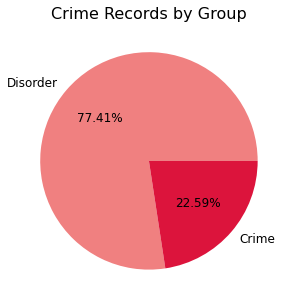

In [39]:
df3 = df.groupby('Group').Crimes.sum().sort_values(ascending=False) # all crime records, groupby by group and sum up

plt.subplots(figsize=(11, 5))
plt.rcParams['font.size']=12
plt.pie(df3, labels=df3.index, autopct='%.2f%%', colors=['lightcoral', 'crimson']); # keep 2 decimal places as percentage
plt.title('Crime Records by Group', fontsize=16);

print('Crime Data Breakdown:')
print('---------------------')
print('1. Crime Records can be divided into 2 major groups: crime and disorder.')
print("2. Don't Panic! Most of records in the crime dataset are actually disorders, not real crimes.")
print('')
print('Guiding Question: What are general categories for crime records in Calgary?')

Crime Data Breakdown:
---------------------
1. More than 70% of crime records are social disorder cases.
2. For non-disorder crimes, theft from vehicle and theft of vehicle happened most frequently.

Guiding Question: What kind of crime happened most frequently?


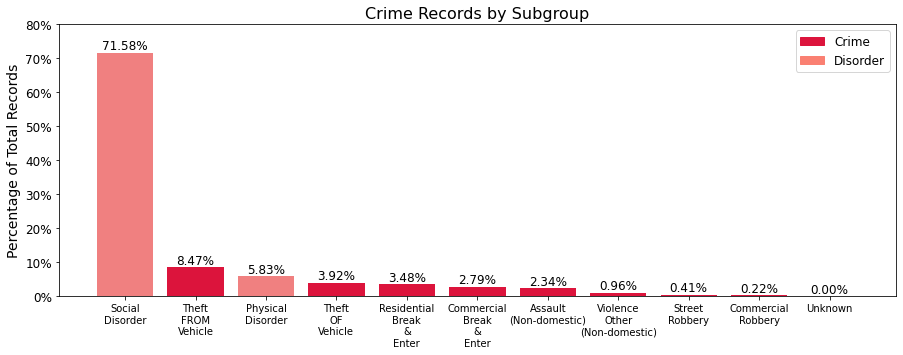

In [40]:
df4 = df.groupby('Category').Crimes.sum().sort_values(ascending=False).reset_index() # group by category and sum up
tot = df4.Crimes.sum(); df4.Crimes = df4.Crimes/tot # calculate percentage for each category to total records
df4.Category = [i.replace(' ', '\n') for i in df4.Category] # word wrap for long crime and disorder names
d='lightcoral'; c='crimson'; colors=[d,c,d,c,c,c,c,c,c,c,c] # colors for different categories, one for crimes one for disorders

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(df4.Category, df4.Crimes, color=colors)
ax.set_ylim((0, .8))
ax.set_ylabel('Percentage of Total Records', fontsize=14)
ax.set_title('Crime Records by Subgroup', fontsize=16)
ax.tick_params(axis='x', labelsize=10)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in np.arange(0,.9,.1)]) # for y-axis, show as percentage without decimals, 0-80%

class1 = mp.Patch(color='crimson', label='Crime')
class2 = mp.Patch(color='salmon', label='Disorder')
plt.legend(handles=[class1, class2]) # add a legend

for i in range(df4.shape[0]): # add two-decimal-place data label for each category for percentages of total records
    plt.text(i, df4.Crimes[i]+.01, ('%.2f'%(100*df4.Crimes[i]))+'%', ha='center', c='k') 

print('Crime Data Breakdown:')
print('---------------------')
print('1. More than 70% of crime records are social disorder cases.')
print('2. For non-disorder crimes, theft from vehicle and theft of vehicle happened most frequently.')
print('')
print('Guiding Question: What kind of crime happened most frequently?')

Location Data Breakdown:
------------------------
1. There are approximately 300 communities in Calgary that are categorized into 8 sectors.
2. For those communities left blank, no crime records were found, e.g. University District.

Guiding Question: Can I have a map for Calgarian sectors and communities?


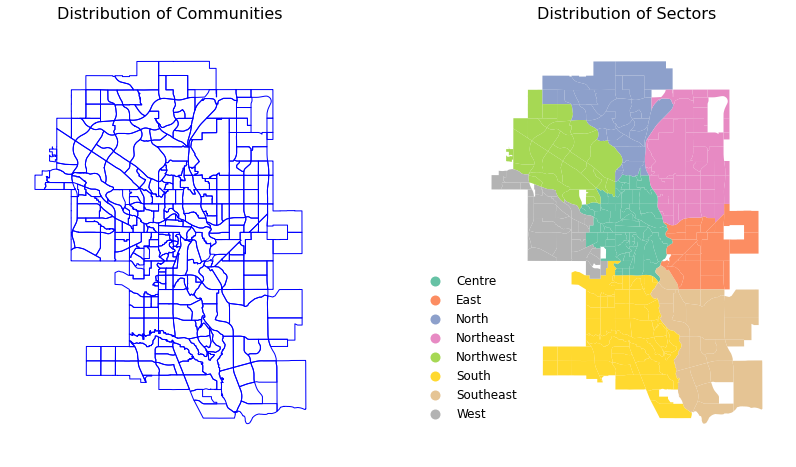

In [41]:
proj = gcrs.AlbersEqualArea(central_latitude=51.0478, central_longitude=-114.0593) # geo-center for Calgary
fig, axs = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection':proj}) # set projection type

gplt.polyplot(cal, ax=axs[0], edgecolor='blue') # for communities only
axs[0].set_title('Distribution of Communities', fontsize=16)

gplt.choropleth(cal, hue='Sector', linewidth=0, cmap='Set2', legend=True, ax=axs[1],
                legend_kwargs={'bbox_to_anchor':(.2,.45), 'frameon':False}) # communities colored by sectors
axs[1].set_title('Distribution of Sectors', fontsize=16)

print('Location Data Breakdown:')
print('------------------------')
print('1. There are approximately 300 communities in Calgary that are categorized into 8 sectors.')
print('2. For those communities left blank, no crime records were found, e.g. University District.')
print('')
print('Guiding Question: Can I have a map for Calgarian sectors and communities?')

Location Data Breakdown:
------------------------
1. In Calgary, population distributed unevenly across different communities.
2. Population in 133 communities increased from 2012 to 2019, while 84 decreased.

Guiding Question: Population distribution and how did it changed in Calgary?


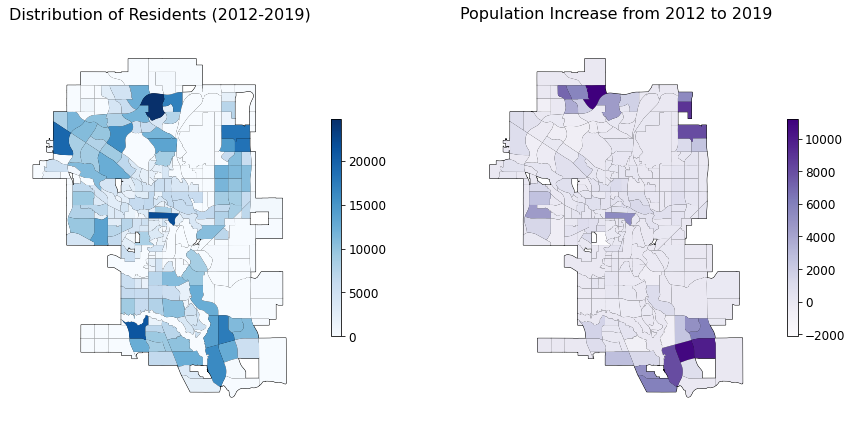

In [42]:
y1 = df[df.Year==2012]; y2 = df[df.Year==2019] # data in 2012 as y1, data in 2019 as y2
y1 = y1.groupby(['Community', 'Month']).Residents.max().reset_index()
y1 = y1.groupby(['Community']).Residents.mean().reset_index()
y2 = y2.groupby(['Community', 'Month']).Residents.max().reset_index()
y2 = y2.groupby(['Community']).Residents.mean().reset_index() # for both data, calculate average annual residents
y3 = y1.merge(y2, on='Community'); y3 = y3.rename(columns={'Residents_x':'Residents12', 'Residents_y':'Residents19'})
y3['Increase'] = y3.Residents19-y3.Residents12 # merge 2012 and 2019 data, change column names
z = y3.merge(calgeo, on='Community'); z = gpd.GeoDataFrame(z, crs='EPSG:4326') # turn dataset into geo-data

proj = gcrs.AlbersEqualArea(central_latitude=51.0478, central_longitude=-114.0593) # center of Calgary
fig, axs = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection':proj})

gplt.polyplot(cal, ax=axs[0])
gplt.choropleth(cal, hue='Residents', linewidth=0, cmap='Blues', legend=True, ax=axs[0],
                legend_kwargs={'shrink':0.5});
axs[0].set_title('Distribution of Residents (2012-2019)', fontsize=16) # this is only the average resident from 2012 to 2019

gplt.polyplot(z, ax=axs[1])
gplt.choropleth(z, hue='Increase', linewidth=0, cmap='Purples', legend=True, ax=axs[1],
                legend_kwargs={'shrink':0.5}); # average resident in 2019, minus average resident in 2012
axs[1].set_title('Population Increase from 2012 to 2019', fontsize=16)

print('Location Data Breakdown:')
print('------------------------')
print('1. In Calgary, population distributed unevenly across different communities.')
print('2. Population in 133 communities increased from 2012 to 2019, while 84 decreased.')
print('')
print('Guiding Question: Population distribution and how did it changed in Calgary?')

In [43]:
# calculate how many communities has population increase from 2012 to 2019

a = z[z.Increase>0].shape[0]
b = z[z.Increase<0].shape[0]
c = round(df[df.Year==2019].shape[0]/df[df.Year==2012].shape[0]-1, 4)*100
print('Communities that population increased:', a)
print('Communities that population decreased:', b)
print('Population increased by', str(c)+'%', 'from 2012-2019 for whole city')

Communities that population increased: 133
Communities that population decreased: 84
Population increased by 21.34% from 2012-2019 for whole city


It's unfair to use crime numbers to represent safety level, since communities with large population tend to have more crimes.<br>

<font color='crimson'>Crime Density ($\rho_{crime}$): crime number per resident per year for certain area.</font><br>

<font color='lightslategrey'>Warning: residents in communities such as airport and parks are 0, since nobody really live there. For those places, calculating crime density is meaningless. Therefore, crime density will only be used for communities with more than 500 residents.</font><br>

Guiding Question: How can we correctly measure safety level by using crime data?

<a id='step3.2'></a>
### <font color='palevioletred'>Step 2. Bivariate Analysis</font>
Here we are going to explore relationships between different data groups:

**Crime vs Time**: crime distribution by year, and by month<br>**Crime vs Location**: crime distribution by sector, and by communities <font color='lightslategrey'>(maps will be provided for this part)

Crime vs Time:
--------------
1. Both total crimes and crime density values in Calgary is increasing during recent years.
2. Safety issue got worse specially in the year of 2015, probably due to oil price collapse.

Guiding Question: Is Calgary becoming a safer place during recent years?


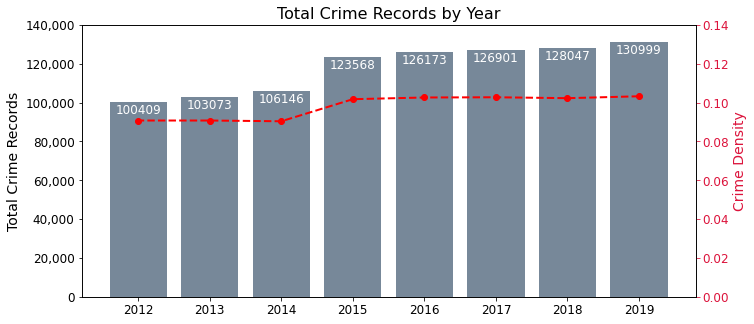

In [44]:
pop = df.groupby(['Sector', 'Community', 'Year', 'Month']).Residents.mean().reset_index()
pop_raw = pop.groupby(['Sector', 'Community', 'Year']).Residents.mean().reset_index()
pop_yr = pop_raw.groupby('Year').Residents.sum().reset_index() # to get residents in each year, for entire Calgary

df5 = df.groupby('Year').Crimes.sum().sort_values(ascending=False).reset_index() # crime records for each year
df5 = pd.merge(df5, pop_yr, on=['Year']) # dataframe with year, crime each year, and residents in each year
df5['CrimeDensity'] = df5.Crimes/df5.Residents # crime density values for each year

fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)
ax.bar(df5.Year, df5.Crimes, color='lightslategrey')
ax.set_ylabel('Total Crime Records', fontsize=14)
ax.set_title('Total Crime Records by Year', fontsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # add ',' for thousands, no decimal places
ax.set_ylim((0, 140000))

for i in range(df5.shape[0]):
    plt.text(df5.Year[i], df5.Crimes[i]-6000, df5.Crimes[i], ha='center', color='w') # text each bar

ax1 = ax.twinx()
ax1.plot(df5.Year, df5.CrimeDensity, 'ro--', linewidth=2, markersize=6)
ax1.set_ylabel('Crime Density', fontsize=14)
ax1.tick_params(axis='y', colors='crimson'); ax1.yaxis.label.set_color('crimson')
ax1.set_ylim((0, .14))

print('Crime vs Time:')
print('--------------')
print('1. Both total crimes and crime density values in Calgary is increasing during recent years.')
print('2. Safety issue got worse specially in the year of 2015, probably due to oil price collapse.')

print('')
print('Guiding Question: Is Calgary becoming a safer place during recent years?')

Crime vs Time:
--------------
1. Both crime numbers and density values are at peak during summer and low during winter.
2. The seasonality is quite obvious for crimes since Calgary has extremely cold winters.

Guiding Question: Which time in a year is relatively safe?


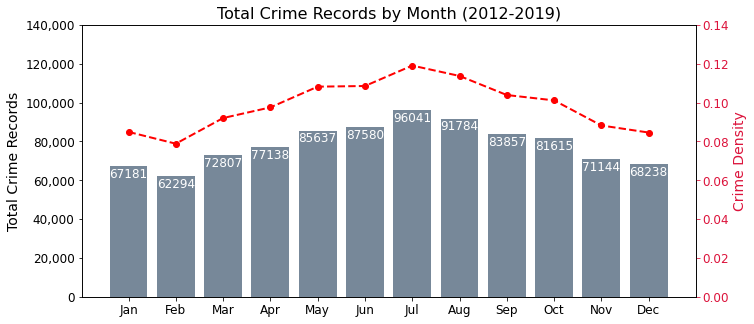

In [45]:
pop_mth = pop.groupby('Month').Residents.sum().reset_index()

df6 = df.groupby('Month').Crimes.sum().reset_index()
df6 = pd.merge(df6, pop_mth, on=['Month'])
df6['CrimeDensity'] = 12*df6.Crimes/df6.Residents # we have to annualize all monthly crime density by *12
df6 = df6.sort_values('Month', ascending=True)
df6.Month = [calendar.month_abbr[i] for i in df6.Month] # change month from integer to abbreviations (e.g. 1 to Jan)

fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)
ax.bar(df6.Month, df6.Crimes, color='lightslategrey')
ax.set_ylabel('Total Crime Records', fontsize=14)
ax.set_title('Total Crime Records by Month (2012-2019)', fontsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # add ',' for thousands, no decimal places
ax.set_ylim((0, 140000))

for i in range(df6.shape[0]):
    plt.text(df6.Month[i], df6.Crimes[i]-6000, df6.Crimes[i], ha='center', color='w')

ax1 = ax.twinx() # another y-axis on right hand side, for crime density
ax1.plot(df6.Month, df6.CrimeDensity, 'ro--', linewidth=2, markersize=6)
ax1.set_ylabel('Crime Density', fontsize=14)
ax1.tick_params(axis='y', colors='crimson'); ax1.yaxis.label.set_color('crimson')
ax1.set_ylim((0, .14))

print('Crime vs Time:')
print('--------------')
print('1. Both crime numbers and density values are at peak during summer and low during winter.')
print('2. The seasonality is quite obvious for crimes since Calgary has extremely cold winters.')

print('')
print('Guiding Question: Which time in a year is relatively safe?')

Crime vs Location:
------------------
1. Based on total crime records, Centre Calgary is much more dangerous than other sectors.
2. Based on the data of crime density, East and Centre Calgary are on the lowest safety level.

Guiding Question: Which area in Calgary is relatively safe?


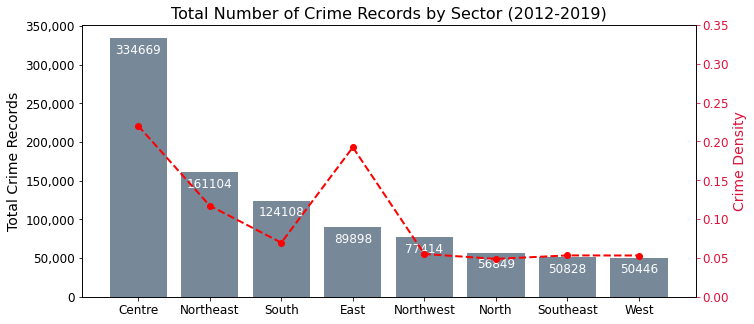

In [46]:
pop_sc = pop_raw.groupby('Sector').Residents.sum().reset_index()

df1 = df.groupby('Sector').Crimes.sum().sort_values(ascending=False).reset_index()
df1 = pd.merge(df1, pop_sc, on=['Sector'])
df1['CrimeDensity'] = df1.Crimes/df1.Residents # dataframe with crime, sector, and crime densities

fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)
ax.bar(df1.Sector, df1.Crimes, color='lightslategrey')
ax.set_ylabel('Total Crime Records', fontsize=14)
ax.set_title('Total Number of Crime Records by Sector (2012-2019)', fontsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

for i in range(df1.shape[0]):
    plt.text(i, df1.Crimes[i]-20000, df1.Crimes[i], ha='center', c='w')

ax1 = ax.twinx()
ax1.plot(df1.Sector, df1.CrimeDensity, 'ro--', linewidth=2, markersize=6)
ax1.set_ylabel('Crime Density', fontsize=14)
ax1.tick_params(axis='y', colors='crimson'); ax1.yaxis.label.set_color('crimson')
ax1.set_ylim((0, .35))

print('Crime vs Location:')
print('------------------')
print('1. Based on total crime records, Centre Calgary is much more dangerous than other sectors.')
print('2. Based on the data of crime density, East and Centre Calgary are on the lowest safety level.')

print('')
print('Guiding Question: Which area in Calgary is relatively safe?')

Crime vs Location:
------------------
1. Beltline and Downtown Commercial Core are in downtown area, both belong to Centre Calgary.
2. Downtown Commercial Core is 'outstanding' in terms of both crime number and crime density.

Guiding Question: Which area in Calgary is relatively unsafe?


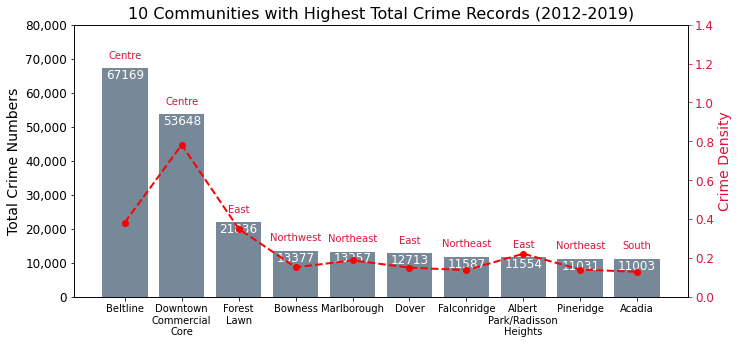

In [47]:
pop_cm = pop_raw.groupby('Community').Residents.sum().reset_index()

df2 = df.groupby('Community').Crimes.sum().sort_values(ascending=False).reset_index().iloc[:10,] # top 10 communities for crimes
df2 = pd.merge(df2, pop_cm, on=['Community'])
df2['CrimeDensity'] = df2.Crimes/df2.Residents # calculate crime densities
df2.Community = [i.replace(' ', '\n') for i in df2.Community] # word wrap for communities with long names

sector = []
for i in df2.Community:
    i = i.replace('\n', ' ')
    sector.append(df[df.Community==i].Sector.values[0]) # sector for each community

fig, ax = plt.subplots(figsize=(11, 5))
ax.bar(df2.Community, df2.Crimes, color='lightslategrey')
ax.set_ylabel('Total Crime Numbers', fontsize=14)
ax.set_title('10 Communities with Highest Total Crime Records (2012-2019)', fontsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='x', labelsize=10)
ax.set_ylim((0, 80000))

for i in range(df2.shape[0]):
    plt.text(i, df2.Crimes[i]-3000, df2.Crimes[i], ha='center', c='w') # text each bar with crime records
    plt.text(i, df2.Crimes[i]+3000, sector[i], ha='center', c='crimson', fontsize=10) # text each bar with sector belongs to

ax1 = ax.twinx() # second y-axis on the right hand side
ax1.plot(df2.Community, df2.CrimeDensity, 'ro--', linewidth=2, markersize=6)
ax1.set_ylabel('Crime Density', fontsize=14)
ax1.tick_params(axis='y', colors='crimson'); ax1.yaxis.label.set_color('crimson')
ax1.set_ylim((0, 1.4))

print('Crime vs Location:')
print('------------------')
print('1. Beltline and Downtown Commercial Core are in downtown area, both belong to Centre Calgary.')
print("2. Downtown Commercial Core is 'outstanding' in terms of both crime number and crime density.")

print('')
print('Guiding Question: Which area in Calgary is relatively unsafe?')

Crime vs Location:
------------------
1. Downtown area is exceptionally unsafe, in terms of both crime number and density.
2. Crime density map gives us a better comparison of safety level across communities.

Guiding Question: Can I have a crime map?


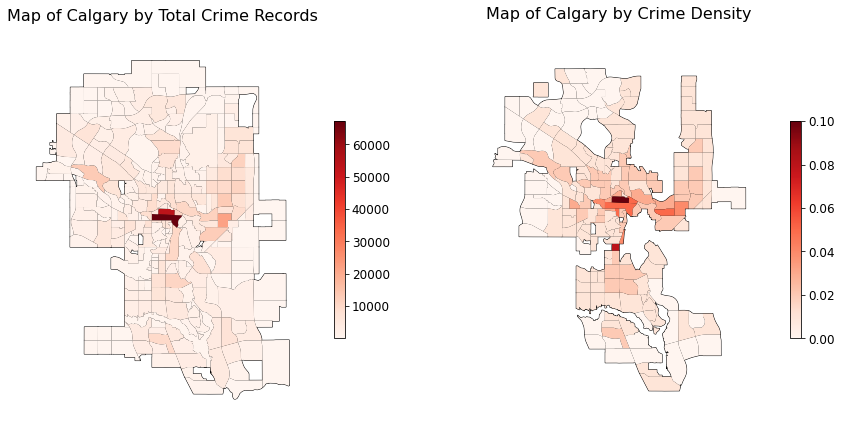

In [48]:
proj = gcrs.AlbersEqualArea(central_latitude=51.0478, central_longitude=-114.0593) # select city location
fig, axs = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection':proj}) # select projection

gplt.polyplot(cal, ax=axs[0]) # base map
gplt.choropleth(cal, hue='Crimes', linewidth=0, cmap='Reds', legend=True, ax=axs[0],
                legend_kwargs={'shrink':0.5}); # draw the map for total crimes
axs[0].set_title('Map of Calgary by Total Crime Records', fontsize=16)

cal0 = cal[cal.Residents>500] # only put communities with residents above 500, otherwise crime density might not be accurate
cal0.CrimeDensity = round(cal0.CrimeDensity/8, 2) # annual crime density for sum of 8 years

gplt.polyplot(cal0, ax=axs[1]) # base map
gplt.choropleth(cal0, hue='CrimeDensity', linewidth=0, cmap='Reds', legend=True, ax=axs[1],
                legend_kwargs={'shrink':0.5});
axs[1].set_title('Map of Calgary by Crime Density', fontsize=16, y=1.03)

print('Crime vs Location:')
print('------------------')
print('1. Downtown area is exceptionally unsafe, in terms of both crime number and density.')
print('2. Crime density map gives us a better comparison of safety level across communities.')

print('')
print('Guiding Question: Can I have a crime map?')

Crime vs Location:
------------------
1. It's easier to compare after ruling out most unsafe regions and applying k-means algorithm.
2. In general, East Calgary is relatively unsafe, while Northwest, North and West look safer.

Guiding Question: Can I have a better crime map?


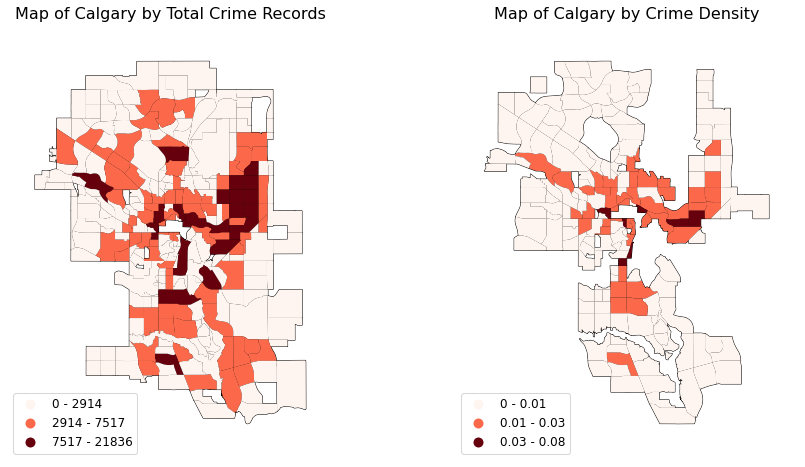

In [49]:
cal1 = cal[~cal.Community.isin(['Beltline','Downtown Commercial Core'])] # kick out two outliers
# those two communities has over too high crime records/crime rate and we want to check the rest

proj = gcrs.AlbersEqualArea(central_latitude=51.0478, central_longitude=-114.0593)
fig, axs = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection':proj})

scheme = mc.NaturalBreaks(cal1.Crimes, k=3) # Jenks Natural Breaks algorithm, divide data into 3 groups
gplt.polyplot(cal1, ax=axs[0]) # base map
gplt.choropleth(cal1, hue='Crimes', linewidth=0, cmap='Reds', legend=True, ax=axs[0], scheme=scheme,
                legend_kwargs={'loc':'lower left'});
axs[0].set_title('Map of Calgary by Total Crime Records', fontsize=16)

cal2 = cal1[cal1.Residents>500]; cal2.CrimeDensity = round(cal2.CrimeDensity/8, 2)
scheme = mc.NaturalBreaks(cal2.CrimeDensity, k=3)
gplt.polyplot(cal2, ax=axs[1]) # base map
gplt.choropleth(cal2, hue='CrimeDensity', linewidth=0, cmap='Reds', legend=True, ax=axs[1], scheme=scheme,
                legend_kwargs={'loc':'lower left'});
axs[1].set_title('Map of Calgary by Crime Density', fontsize=16)

print('Crime vs Location:')
print('------------------')
print("1. It's easier to compare after ruling out most unsafe regions and applying k-means algorithm.")
print('2. In general, East Calgary is relatively unsafe, while Northwest, North and West look safer.')

print('')
print('Guiding Question: Can I have a better crime map?')

In [50]:
print('Crime vs Location (Visualization)')
print('')
print('Guiding Question: Can I have an interactive crime map?')

cald = cal[cal.Residents>500]; cald.CrimeDensity = round(cald.CrimeDensity, 2) # use Jenks Natural Breaks to divide
cald.explore(column='CrimeDensity', tooltip=['Community', 'Crimes', 'CrimeDensity'], popup=True, scheme='naturalbreaks',
            legend=True, k=3, cmap='Reds', tiles='Stamen Toner', zoom_start=11,
            style_kwds=dict(color='black', weight=1), legend_kwds=dict(colorbar=False, fmt='{:.2f}'))

Crime vs Location (Visualization)

Guiding Question: Can I have an interactive crime map?


<a id='step3.3'></a>
### <font color='palevioletred'>Step 3. Multivariate Analysis</font>
Finally, we are going to explore relationships between all 3 data groups:

**Crime vs Time & Location**: crime related parameters by locations during 2012-2019<br>

<font color='lightslategrey'>Animations will be provided for the entire of this part</font>

In [51]:
dfa = df.groupby(['Sector', 'Community', 'Year', 'Month']).Residents.mean().reset_index()
dfb = df.groupby(['Sector', 'Community', 'Year']).Crimes.sum().reset_index()
dfc = dfa.groupby(['Sector', 'Community', 'Year']).Residents.mean().reset_index()
loc = df[['Latitude', 'Longitude', 'Community']]
loc = loc.groupby('Community').mean().reset_index()

# dataset for animation by communities
dfx = dfc.merge(dfb, on=('Sector', 'Community', 'Year'))
dfx['CrimeDensity'] = round(dfx.Crimes/dfx.Residents, 3)
dfx = dfx.merge(loc, on='Community')
dfx = dfx[dfx.Residents>500]

# dataset for animation by sectors
dfy = dfx.groupby(['Year', 'Sector']).sum().reset_index()
dfy.CrimeDensity = round(dfy.Crimes/dfy.Residents, 3)
dfy = dfy.sort_values(['Year', 'CrimeDensity'], ascending=[True, False])

In [52]:
print('1. Centre Calgary is getting more unsafe during recent years with increasing crime density.')
print("2. From 2012 to 2019, safe sectors are always safe, unsafe sectors are still unsafe.")
print('')
print('Guiding Question: I want to see how safety level changes by both location and time.')

color = ['crimson', 'gold', 'cornflowerblue']
fig = px.bar(dfy, x='CrimeDensity', y='Sector', animation_frame='Year', animation_group='Sector',
       color='Sector', hover_name='Sector', orientation='h', text='CrimeDensity',
       color_discrete_map={'Centre':color[0], 'Northeast':color[1], 'South':color[1], 'East':color[1],
                           'Northwest':color[2], 'West':color[2], 'North':color[2], 'Southeast':color[2]})

fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')
fig.update_xaxes(range=[0, .25], color='black'); fig.update_yaxes(color='black')
fig.update_layout(title={
    'text':'Crime Density by Sector (2012-2019)',
    'y':.95,
    'x':.5,
    'xanchor':'center',
    'yanchor':'top',
    'font_color':'black'},
                  showlegend=False)

1. Centre Calgary is getting more unsafe during recent years with increasing crime density.
2. From 2012 to 2019, safe sectors are always safe, unsafe sectors are still unsafe.

Guiding Question: I want to see how safety level changes by both location and time.


In [53]:
print('1. Crime density fluctuation could be obvious for a single community within a few years.')
print('2. More analysis will be carried out for downtown, since lots of crimes happened there.')
print('')
print('Guiding Question: I want to see how safety level changes by both location and time.')

color = ['orangered', 'royalblue', 'cyan', 'orange', 'limegreen', 'yellow', 'fuchsia', 'lightgrey']
fig = px.scatter(dfx, x='Longitude', y='Latitude', animation_frame='Year', animation_group='Community',
           size='CrimeDensity', color='Sector', hover_name='Community', size_max=40,
           color_discrete_map={'Centre':color[0], 'Northeast':color[1], 'South':color[2], 'East':color[3],
                               'Northwest':color[4], 'West':color[5], 'North':color[6], 'Southeast':color[7]})

fig.update_xaxes(showgrid=False, color='black', showticklabels=False)
fig.update_yaxes(showgrid=False, color='black', showticklabels=False)
fig.update_traces(marker_line_width=0, opacity=.9)
fig.update_layout(title={
    'text':'Crime Density by Community (2012-2019)',
    'y':.95,
    'x':.5,
    'xanchor':'center',
    'yanchor':'top',
    'font_color':'black'},
                  showlegend=True, plot_bgcolor='lightslategrey')

1. Crime density fluctuation could be obvious for a single community within a few years.
2. More analysis will be carried out for downtown, since lots of crimes happened there.

Guiding Question: I want to see how safety level changes by both location and time.


In [54]:
# 6 major communities are covered in downtown area
dtwn = ['Downtown Commercial Core', 'Beltline', 'Eau Claire', 'Downtown West End', 'Chinatown', 'Downtown East Village']
ind = []
for i in df.Community:
    if i in dtwn:
        ind.append('Downtown')
    else:
        ind.append('Elsewhere')
df['Location'] = ind # categorize dataframe into downtown and non-downtown data
dfc = df[df.Group=='Crime'] # crime only

In [55]:
dfc = dfc.groupby(['Year', 'Location', 'Category']).Crimes.sum().reset_index()
tot = dfc.groupby(['Year', 'Location']).Crimes.sum().reset_index()
tot = tot.rename(columns={'Crimes':'TotalCrimes'})
dfc = dfc.merge(tot, on=['Year', 'Location'])
dfc['CrimePercentage'] = round(dfc.Crimes/dfc.TotalCrimes, 4) # calculate crime percentage for each category
dfc = dfc.sort_values(['Year', 'CrimePercentage'])

In [56]:
print("1. Percentages for commercial break & enter as well as assault are higher in downtown.")
print('2. Percentages for residential break & enter and theft of vehicle are lower in downtown.')
print('3. Commercial break & enter outweighed non-domestic assault in downtown area since 2019.')
print('')
print("Guiding Question: How unsafe is the downtown area, what's the major crime specie here?")

color = ['crimson', 'salmon']
fig = px.bar(dfc, x='CrimePercentage', y='Category', animation_frame='Year', animation_group='Category',
       color='Location', hover_name='Category', orientation='h', text=None,
       color_discrete_map={'Downtown':color[0], 'Elsewhere':color[1]})

fig.update_layout(barmode='group')
fig.update_xaxes(range=[0, .5], color='black', tickformat = ',.0%'); fig.update_yaxes(color='black')
fig.update_layout(title={
    'text':'Composition of Crimes by Category, for Downtown and Elsewhere (2012-2019)',
    'y':.95,
    'x':.5,
    'xanchor':'center',
    'yanchor':'top',
    'font_color':'black'},
                  showlegend=True)

1. Percentages for commercial break & enter as well as assault are higher in downtown.
2. Percentages for residential break & enter and theft of vehicle are lower in downtown.
3. Commercial break & enter outweighed non-domestic assault in downtown area since 2019.

Guiding Question: How unsafe is the downtown area, what's the major crime specie here?


<a id='p4'></a>
## <font color='palevioletred'>Part 4. Conclusion</font>
[Step 1. Summary of Findings and Insights](#step4.1)<br>[Step 2. Possible Next Steps](#step4.2)

<a id='step4.1'></a>
### <font color='palevioletred'>Step 1. Summary of Findings and Insights</font>

**Time-related:**<br>
<font color='lightslategrey'>1. winter is relatively safe in Calgary, compared to other seasons.<br>2. unfortunately Calgary is getting more dangerous during recent years, especially the downtown area.</font>

**Location-related**:<br>
<font color='lightslategrey'>1. suburban areas like the northwest, west and north Calgary are relatively safe.<br>2. downtown is the most dangerous region, as well as east Calgary.<br>3. theft of vehicle, residential break/enter happened less frequently in downtown, perhaps due to higher condo rate for housing.<br>4. downtown has higher percentage for assault and commercial break/enter, perhaps due to more businesses and entertainments.</font>

**Crime-related**:<br>
<font color='lightslategrey'>1. in Calgary, around 70% of crime records are disorders.<br>2. theft from vehicle is the most popular crime, for both downtown and suburban area.<br>3. by using crime density, we can partly offset the influence of population to crime numbers.<br>4. however, crime density won't work well for places with few residents.</font>

**Advanced-level**:<br>
<font color='lightslategrey'>1. we produced many maps for better illustration, including one interactive map.<br>2. measured by crime density, relatively safe regions in 2012 are still relatively safe in 2019.</font>

<a id='step4.2'></a>
### <font color='palevioletred'>Step 2. Possible Next Steps</font>
Here are a few things we can do for better research results:

<font color='lightslategrey'>1. search for crime data from 2020 to 2021, to investigate safety issue during COVID-19.<br>2. search for crime data with days and hours, to test which day in a week, and which time in a day is safe.<br>3. search for crime data with locations for each crime, to investigate which block or building is unsafe.<br>4. search floating population for each community, to get better crime density results than using residents.

# <font color='palevioletred'>THANKS</font>

In [57]:
#!jupyter nbconvert Project.ipynb --to slides --post serve --no-input --no-prompt